In [20]:
import pandas as pd
import json
import os

DATA_PATH = "./data/"

with open(DATA_PATH + 'train2018.json') as json_data:
    data = json.load(json_data)

In [4]:
list(data.keys())

[u'info', u'images', u'licenses', u'annotations', u'categories']

In [17]:
data["info"]

{u'contributor': u'iNaturalist Competition group',
 u'date_created': u'2018-02-01 17:26:07.239765',
 u'description': u'The 2018 FGVC^5 iNaturalist Competition dataset.',
 u'url': u'https://github.com/visipedia/inat_comp',
 u'version': u'1.0',
 u'year': 2018}

In [18]:
data["licenses"]

[{u'id': 1,
  u'name': u'Attribution-NonCommercial-NoDerivatives License',
  u'url': u'http://creativecommons.org/licenses/by-nc-nd/4.0/'},
 {u'id': 2,
  u'name': u'Attribution-NonCommercial-ShareAlike License',
  u'url': u'http://creativecommons.org/licenses/by-nc-sa/4.0/'},
 {u'id': 3,
  u'name': u'Attribution-NonCommercial License',
  u'url': u'http://creativecommons.org/licenses/by-nc/4.0/'},
 {u'id': 4,
  u'name': u'Attribution-NoDerivatives License',
  u'url': u'http://creativecommons.org/licenses/by-nd/4.0/'},
 {u'id': 5,
  u'name': u'Attribution-ShareAlike License',
  u'url': u'http://creativecommons.org/licenses/by-sa/4.0/'},
 {u'id': 6,
  u'name': u'Attribution License',
  u'url': u'http://creativecommons.org/licenses/by/4.0/'},
 {u'id': 7,
  u'name': u'Public Domain Dedication',
  u'url': u'http://creativecommons.org/publicdomain/zero/1.0/'},
 {u'id': 8,
  u'name': u'No known copyright restrictions',
  u'url': u'http://en.wikipedia.org/wiki/Copyright'}]

In [5]:
images_df = pd.DataFrame.from_dict(data["images"])

In [7]:
print len(images_df)
images_df.head()

437513


,file_name,height,id,license,rights_holder,width
0,train_val2018/Plantae/7477/3b60c9486db1d2ee875...,600,1,3,Jonathan Carpenter,800
1,train_val2018/Aves/2820/22c733d9199c35d2578232...,600,2,3,Marion Zöller,800
2,train_val2018/Aves/2757/e5641ce8fd794bf149d49f...,640,3,3,phylocode,800
3,train_val2018/Mammalia/4219/60c8365f55c2f4e790...,533,4,1,J. N. Stuart,800
4,train_val2018/Aves/3942/872fef47a85beb90efc301...,533,5,3,Alfonso Gutiérrez Aldana,800


In [9]:
annotations_df = pd.DataFrame.from_dict(data["annotations"])
print len(annotations_df)
annotations_df.head()

437513


,category_id,id,image_id
0,7477,1,1
1,2820,2,2
2,2757,3,3
3,4219,4,4
4,3942,5,5


In [14]:
categories_df = pd.DataFrame.from_dict(data["categories"]).set_index("id")
print len(categories_df)
categories_df.head()

8142


,class,family,genus,kingdom,name,order,phylum,supercategory
id,,,,,,,,
0,AKFRWQ,MAMLLO,AEDDWW,OMEYTF,0,WLRHUS,EPWQGN,Animalia
1,AKFRWQ,QKPEBV,LRSWTV,OMEYTF,1,WGRIQM,EPWQGN,Animalia
2,AKFRWQ,VOIFIY,PGNAZZ,OMEYTF,2,WGRIQM,EPWQGN,Animalia
3,AKFRWQ,BKNLEY,VRMVAT,OMEYTF,3,WGRIQM,EPWQGN,Animalia
4,AKFRWQ,BKNLEY,RGGOLS,OMEYTF,4,WGRIQM,EPWQGN,Animalia


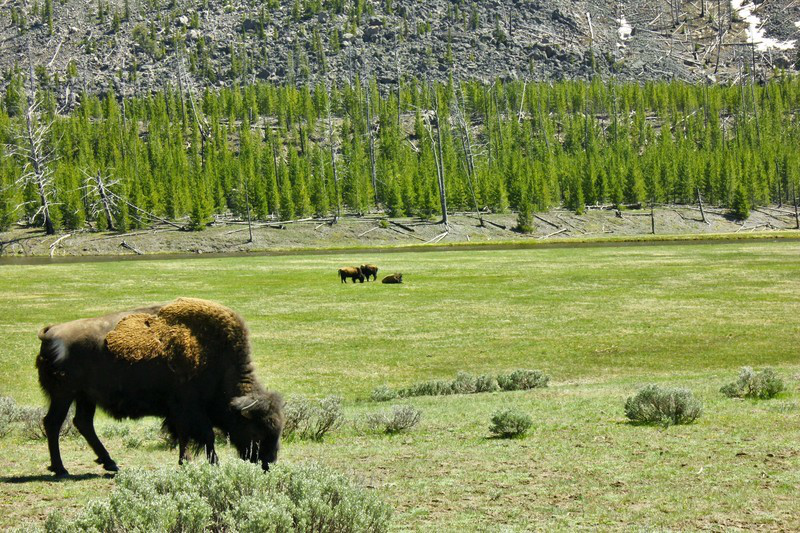

In [40]:
from keras.preprocessing import image
from random import randint
image.load_img(DATA_PATH + images_df["file_name"][randint(0, len(images_df)-1)])

In [42]:
print images_df["file_name"][0]

train_val2018/Plantae/7477/3b60c9486db1d2ee875f11a669fbde4a.jpg


In [46]:
len(annotations_df[annotations_df["category_id"] == 7477])

293

In [47]:
print len(os.listdir(DATA_PATH + "train_val2018/Plantae/7477"))

296


Looks like, that images already structured by category. Now lets check sizeof the images. In description of data, it was said that maximun dimention is 800px. Lets check what we really have.

In [54]:
images_df["height"].describe()

count    437513.000000
mean        642.107793
std         116.415858
min          82.000000
25%         534.000000
50%         600.000000
75%         800.000000
max         800.000000
Name: height, dtype: float64

In [55]:
images_df["width"].describe()

count    437513.000000
mean        747.704518
std          94.664137
min         114.000000
25%         755.000000
50%         800.000000
75%         800.000000
max         800.000000
Name: width, dtype: float64

Lets check how many outliers we have for height 82 or width of 114 + std in the traint set

In [81]:
print len(images_df[images_df["height"] < 82 + 116])
print len(images_df[images_df["width"] < 114 + 95])

94
11


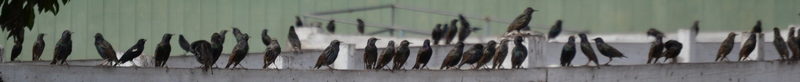

In [65]:
image.load_img(DATA_PATH + images_df[images_df["height"] == 82]["file_name"].values[0])

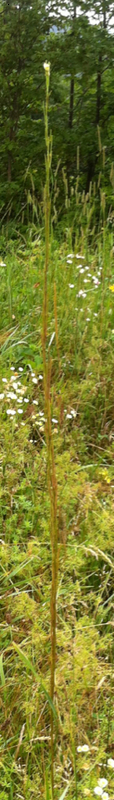

In [67]:
image.load_img(DATA_PATH + images_df[images_df["width"] == 114]["file_name"].values[0])